Try to use an HMM on Nuclear generation data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import pylab
from collections import Counter
import time

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pickle

In [7]:
with open("HMM_1_GenFuelMix.pkl", "rb") as file: HMM_1_GenFuelMix = pickle.load(file)


In [10]:
with open("HMM_best_GenFuelMix12_12.pkl", "rb") as file: model = pickle.load(file)


In [6]:
readcsv_GenMix_2018_2022=pd.read_csv(r"..\ImportData\GenMix_2018_2022.csv")

In [7]:
GenMix_nanremoved = pd.read_pickle('GenMix_nanremoved.pkl')

In [8]:
GenMix_Consolidated = pd.read_pickle('GenMix_Consolidated.pkl')

The HMM lab functions would not be appropriate because the fitting is done by estimating known transition probabilities, and the observations are also discrete, not Gaussian.

HMM python libraries:

hmmlearn 0.2.8\
https://hmmlearn.readthedocs.io/en/latest/  \
https://hmmlearn.readthedocs.io/en/latest/tutorial.html  
https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.GaussianHMM


In [6]:
import sys
!{sys.executable} -m pip install hmmlearn


     -------------------------------------- 110.1/110.1 kB 6.2 MB/s eta 0:00:00


In [11]:
from hmmlearn import hmm


### Examine Nuclear data

In [20]:
Nuclear = GenMix_Consolidated["Nuclear Total"]

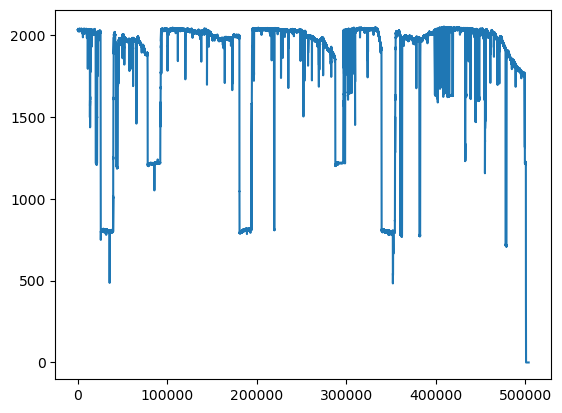

In [36]:
plt.plot(GenMix_Consolidated["Nuclear Total"])

Fundamentals:

SPP has two nuclear plants: 
1. Wolf Creek Generating Station in Kansas, 1200 MW.
2. Cooper Nuclear Station in Nebraska, 835 MW.

https://en.wikipedia.org/wiki/Cooper_Nuclear_Station \
https://en.wikipedia.org/wiki/Wolf_Creek_Generating_Station \
Looked at nuclear plant map
https://www.nppd.com/powering-nebraska/energy-resources/nuclear?locale=en

maybe can be modeled with 7-10 states?

In [16]:
nuclear_train, nuclear_test = train_test_split(Nuclear,train_size = .5,shuffle= False)

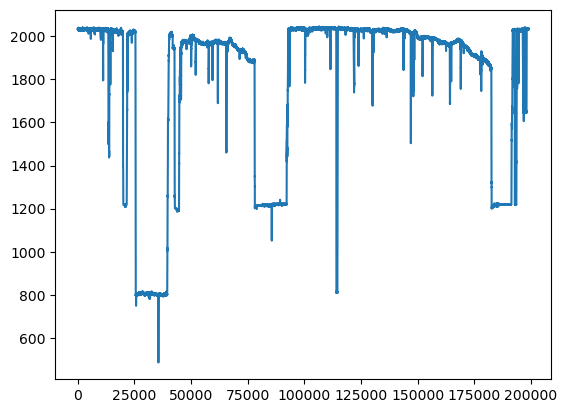

In [17]:
plt.plot(nuclear_train)

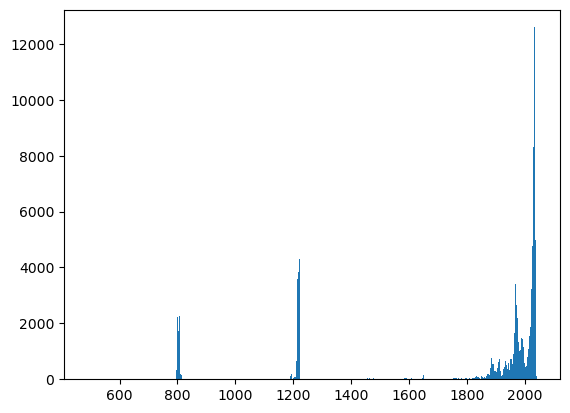

In [20]:
plt.hist(nuclear_train,1000)
plt.show()

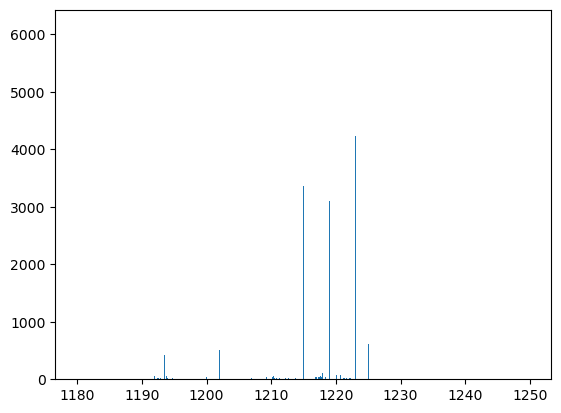

In [100]:
plt.hist(nuclear_train[np.logical_and(nuclear_train>1180,nuclear_train<1250)],1000)
plt.show()

### HMM 1

In [21]:
model = hmm.GaussianHMM(n_components=7, n_iter=100)

In [28]:
nuclear_train.values.reshape(-1, 1)

array([[2033.8, 2034.4, 2034. , ..., 2033.4, 2033.7, 2032.8]])

In [59]:
X = nuclear_train.values.reshape(-1, 1)

In [29]:
model.fit(nuclear_train.values.reshape(-1, 1))


GaussianHMM(n_components=7, n_iter=100)

In [ ]:
# takes a minute

In [33]:
Z2 = model.predict(X)


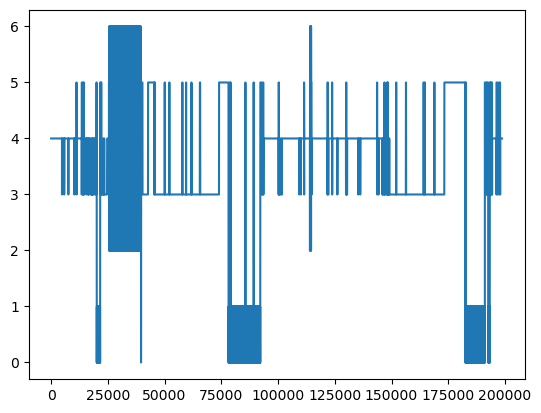

In [35]:
plt.plot(Z2)

(array([12354., 12356.,  7163., 63076., 73573., 23011.,  7160.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

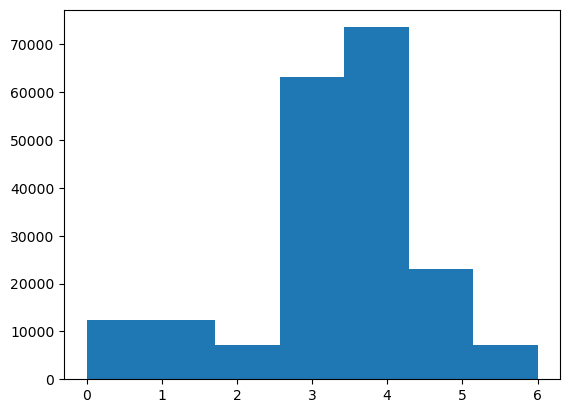

In [38]:
plt.hist(Z2,7)

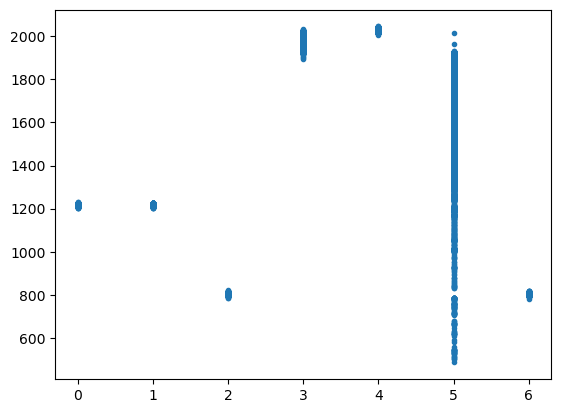

In [61]:
plt.plot(Z2,X,".")

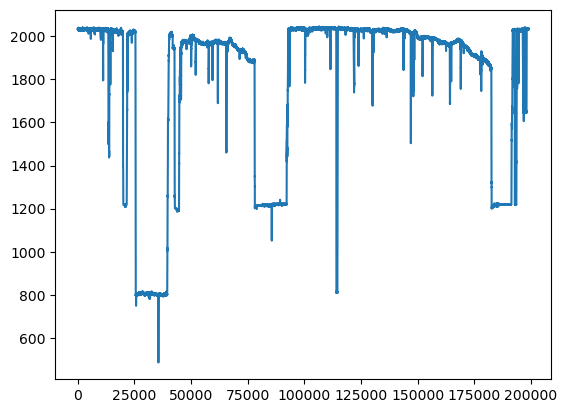

In [36]:
plt.plot(nuclear_train)

In [40]:
vars(model)

{'n_components': 7,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1516768.6838275902, -1360848.8198591555, -1149573.4950930986, -1105198.6919494744, -1088508.886255946, -1060392.7455423188, -1019236.9289396818, -941623.8705686126, -914834.3399547334, -871529.8777680709, -822710.5344904981, -789448.4536185559, -781978.8513009723, -779456.4007323527, -778321.9001745002, -776724.3047184179, -774647.9748111336, -773248.9529556329, -772634.3593178502, -771704.26404317, -771057.3765493317, -770997.4079003095, -770995.7926847745, -770995.6807982968, -770995.6692817693, -770995.6675226804],
     iter=26,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 'means_prior': 0,
 'means_weight': 0,
 'covars_prior': 0.01,
 'covars_wei

(array([2., 0., 0., 2., 0., 0., 0., 1., 0., 2.]),
 array([ 804.13858204,  926.85887797, 1049.57917389, 1172.29946982,
        1295.01976574, 1417.74006167, 1540.46035759, 1663.18065352,
        1785.90094944, 1908.62124537, 2031.34154129]),
 <BarContainer object of 10 artists>)

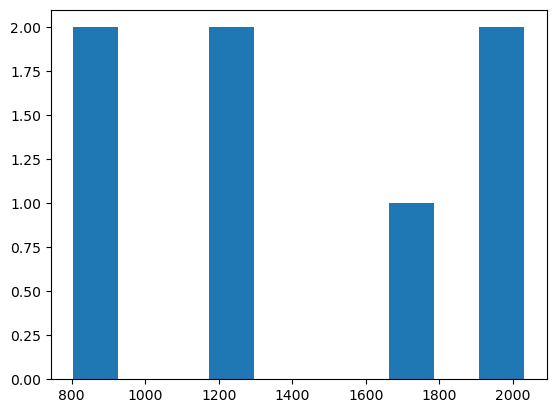

In [41]:
plt.hist(model.means_)

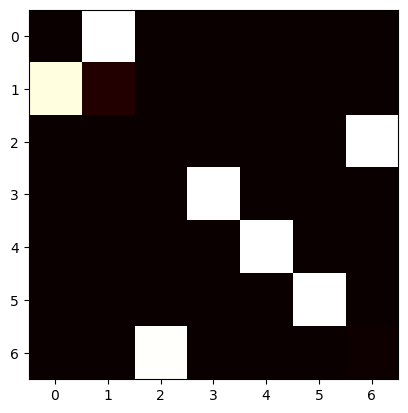

In [42]:
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')


Two of the states are redundant/equivalent to other states. Train with 5 latent states next

In [44]:
with open("HMM_1_GenFuelMix.pkl", "wb") as file: pickle.dump(model, file)


In [45]:
with open("HMM_1_GenFuelMix.pkl", "rb") as file: HMM_1_GenFuelMix = pickle.load(file)


In [46]:
HMM_1_GenFuelMix

GaussianHMM(n_components=7, n_iter=100)

In [47]:
model

GaussianHMM(n_components=7, n_iter=100)

Fundamentals:

SPP has two nuclear plants: 
1. Wolf Creek Generating Station in Kansas, 1200 MW.
2. Cooper Nuclear Station in Nebraska, 835 MW.

https://en.wikipedia.org/wiki/Cooper_Nuclear_Station \
https://en.wikipedia.org/wiki/Wolf_Creek_Generating_Station \
Looked at nuclear plant map
https://www.nppd.com/powering-nebraska/energy-resources/nuclear?locale=en

Sample

In [49]:
X, Z = model.sample(len(nuclear_train))


In [51]:
Xsamp = X
Zsamp = Z

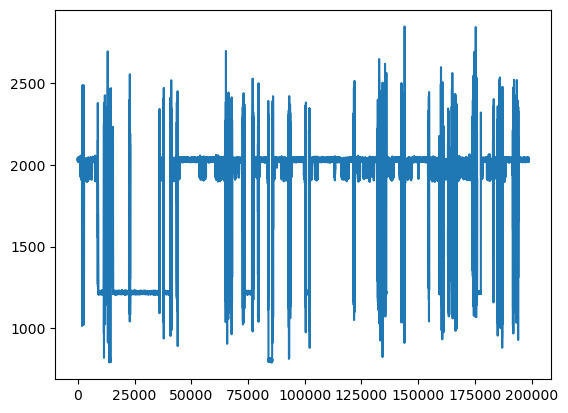

In [52]:
plt.plot(Xsamp)

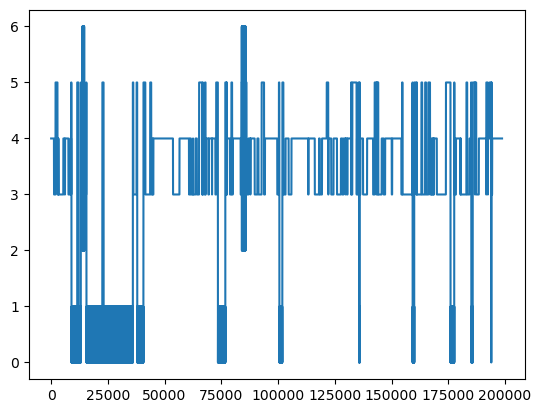

In [53]:
plt.plot(Zsamp)

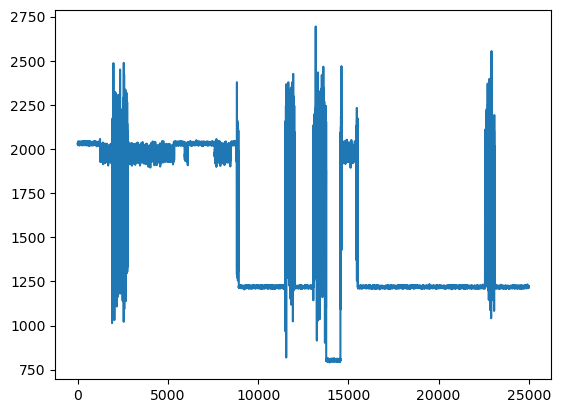

In [55]:
plt.plot(Xsamp[:25000])

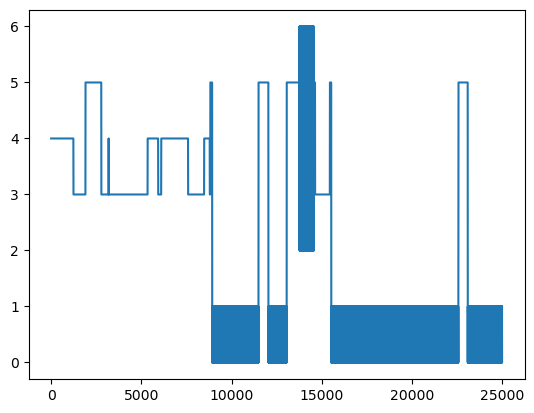

In [56]:
plt.plot(Zsamp[:25000])

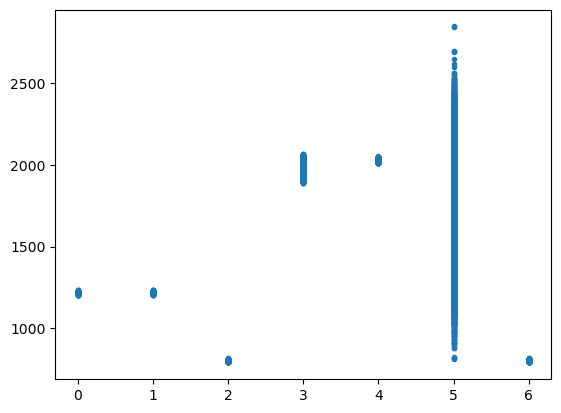

In [60]:
plt.plot(Zsamp,Xsamp,".")

State 5 takes in a lot more variance than expect

### HMM 2

In [64]:
model2 = hmm.GaussianHMM(n_components=5, n_iter=100)

In [28]:
nuclear_train.values.reshape(-1, 1)

array([[2033.8, 2034.4, 2034. , ..., 2033.4, 2033.7, 2032.8]])

In [65]:
Xtrain = nuclear_train.values.reshape(-1, 1)

In [69]:
X = nuclear_train.values.reshape(-1, 1)

In [66]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)


0.0


In [67]:
start = time.process_time()

model2.fit(Xtrain)

print(time.process_time() - start)


40.265625


In [ ]:
# takes 40s

In [70]:
Zpredict = model2.predict(Xtrain)


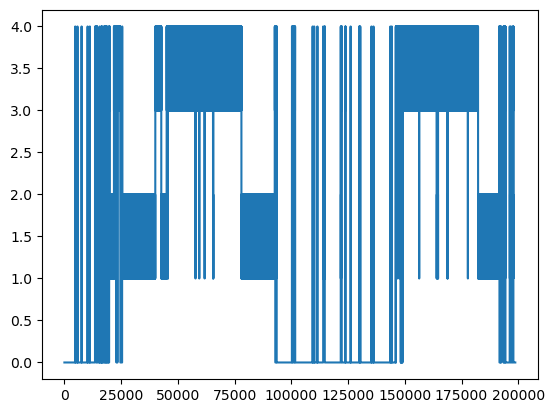

In [71]:
plt.plot(Zpredict)

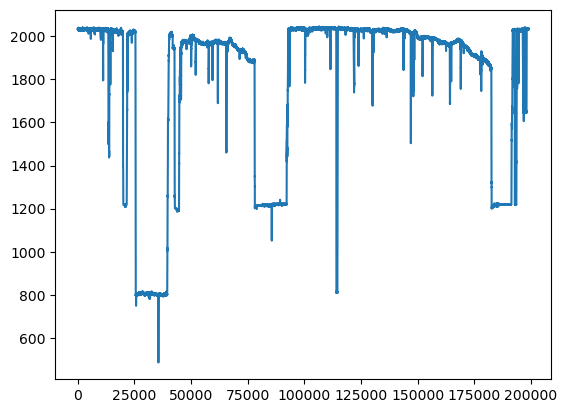

In [74]:
plt.plot(nuclear_train)

(array([73545., 23408., 23446., 39134., 39160.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

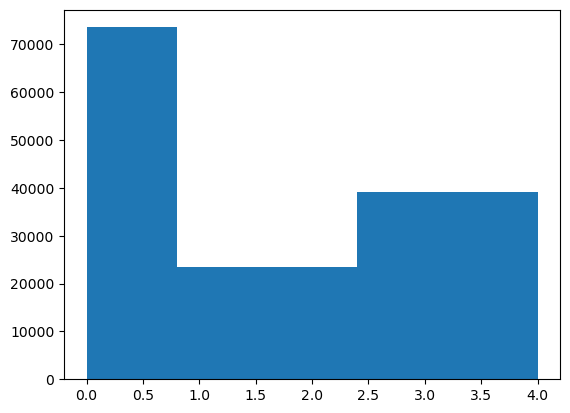

In [72]:
plt.hist(Zpredict,5)

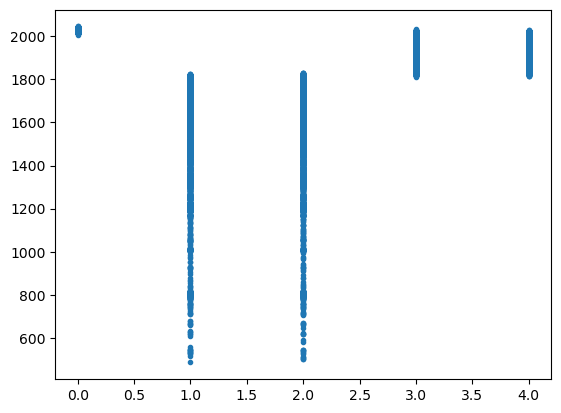

In [73]:
plt.plot(Zpredict,Xtrain,".")

In [75]:
vars(model2)

{'n_components': 5,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1501596.9969220534, -1255366.1483291546, -1129592.9641633627, -1124694.4593723656, -1123954.3313172502, -1123444.7411740306, -1122561.9658235426, -1121132.4360677798, -1119226.5847080732, -1117301.373158806, -1115753.5938060055, -1114593.6268745796, -1113634.8258859648, -1112612.049089956, -1111072.9765488748, -1107970.4249937106, -1100204.622952129, -1077170.9947165218, -1016346.0118768421, -959077.4752600072, -949588.1515152914, -948772.3657057608, -948403.0157202918, -948274.4408937552, -948257.8407277843, -948253.8674647379, -948253.1862084398, -948253.1187709129, -948253.1127580763],
     iter=29,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 '

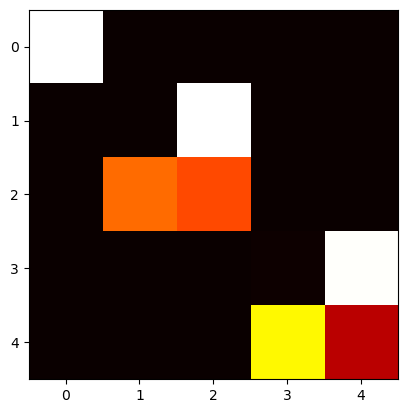

In [87]:
plt.imshow(model2.transmat_, cmap='hot', interpolation='nearest')


In [76]:
# generally not great, high variances

In [77]:
with open("HMM_2_5states_GenFuelMix.pkl", "wb") as file: pickle.dump(model2, file)


### HMM 3
6 states

In [78]:
model3 = hmm.GaussianHMM(n_components=6, n_iter=100)

In [79]:
Xtrain = nuclear_train.values.reshape(-1, 1)

In [80]:
X = nuclear_train.values.reshape(-1, 1)

In [81]:
start = time.process_time()

model3.fit(Xtrain)

print(time.process_time() - start)


50.15625


In [ ]:
# takes 50s

In [82]:
Zpredict = model3.predict(Xtrain)


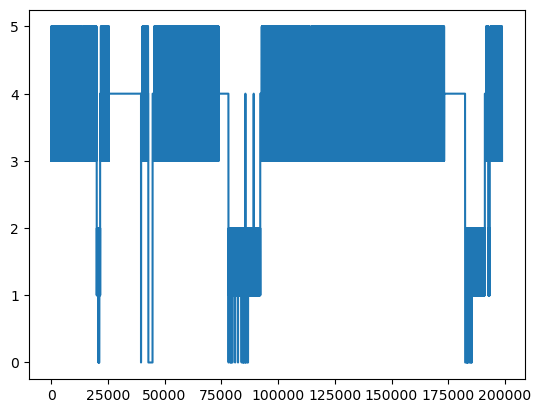

In [83]:
plt.plot(Zpredict)

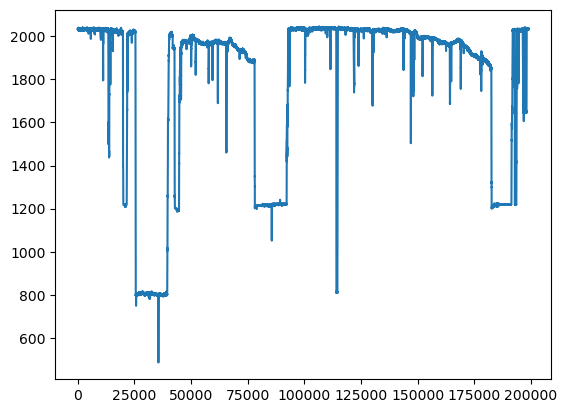

In [84]:
plt.plot(nuclear_train)

(array([ 4466., 11166., 11194., 68135., 35559., 68173.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

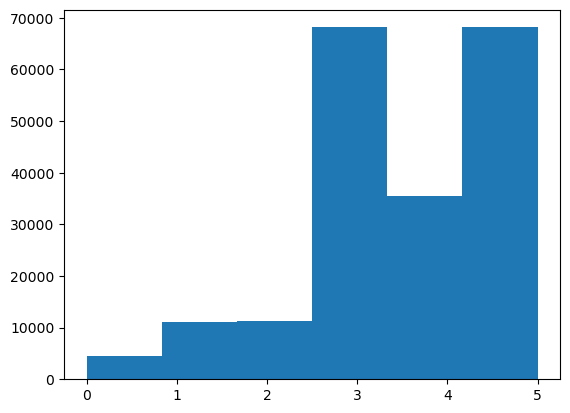

In [85]:
plt.hist(Zpredict,6)

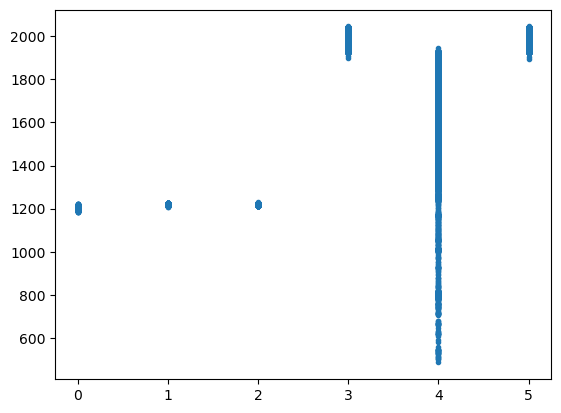

In [89]:
plt.plot(Zpredict,Xtrain,".")

In [88]:
vars(model3)

{'n_components': 6,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 100,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1453236.8776409968, -1268444.6590913406, -1142723.6871099006, -1126548.0795971465, -1124302.9685112184, -1121783.7032181153, -1109408.0708317717, -1086115.645051543, -1073047.787558099, -1054549.6620381277, -1024878.8107255552, -1022732.0617024521, -1021006.8541774855, -1019211.1618964876, -1018548.0234816545, -1017585.0209112568, -1016898.5049460166, -1016812.9130211803, -1016807.0350849617, -1013903.8520385528, -1008089.9967294402, -1005420.6414375058, -1004938.2875839436, -1004906.7718387643, -1004890.8048066002, -1004890.6624054826, -1004890.6596693232],
     iter=27,
     n_iter=100,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 'means_prior': 0,
 'means_weight

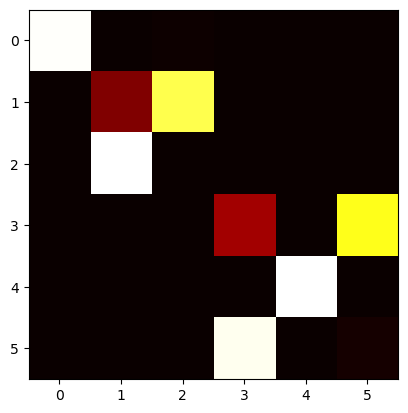

In [92]:
plt.imshow(model3.transmat_, cmap='hot', interpolation='nearest')


In [76]:
# generally not great, high variances

In [90]:
with open("HMM_3_6states_GenFuelMix.pkl", "wb") as file: pickle.dump(model3, file)


### model comparison

Likelihood

In [95]:
model.score(X)


-770995.6669358049

In [94]:
model2.score(X)


-948253.1120031378

In [93]:
model3.score(X)


-1004890.65952904

first model best on likelihood

## 12/12: keep trying

In [21]:
nuclear_train, nuclear_test, date_train, date_test = train_test_split(Nuclear,GenMix_Consolidated['datetime'],train_size = .5,shuffle= False)

In [23]:
date_train

0        2018-01-01 06:00:00+00:00
1        2018-01-01 06:05:00+00:00
2        2018-01-01 06:10:00+00:00
3        2018-01-01 06:15:00+00:00
4        2018-01-01 06:20:00+00:00
                    ...           
251514   2020-05-24 10:00:00+00:00
251515   2020-05-24 10:05:00+00:00
251516   2020-05-24 10:10:00+00:00
251517   2020-05-24 10:15:00+00:00
251518   2020-05-24 10:20:00+00:00
Name: datetime, Length: 251072, dtype: datetime64[ns, UTC]

In [39]:
diff_time = GenMix_Consolidated["datetime"].diff()

In [40]:
GenMix_Consolidated_gaps = GenMix_Consolidated[diff_time!= diff_time[100]]

In [44]:
diff_time[1:][diff_time> 2*diff_time[100]].sort_values().tail(10)

303285   0 days 02:10:00
52547    0 days 02:15:00
463275   0 days 02:15:00
18550    0 days 02:25:00
374084   0 days 02:40:00
66909    0 days 02:40:00
405533   0 days 02:55:00
156504   0 days 03:25:00
463352   0 days 04:40:00
130054   0 days 09:05:00
Name: datetime, dtype: timedelta64[ns]

Text(0.5, 1.0, 'Nuclear Generation in MW')

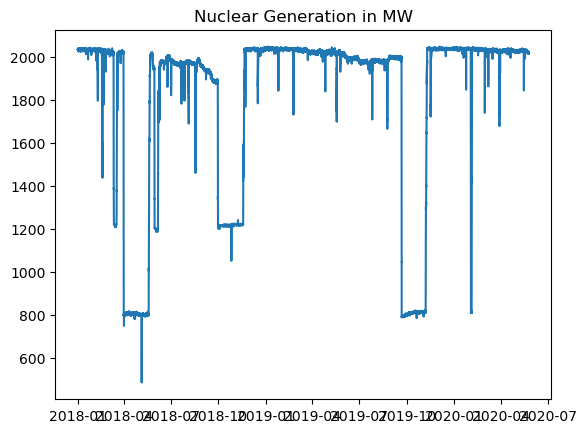

In [58]:

fig, ax = plt.subplots()
plt.plot(date_train,nuclear_train)
ax.set_title("Nuclear Generation in MW")

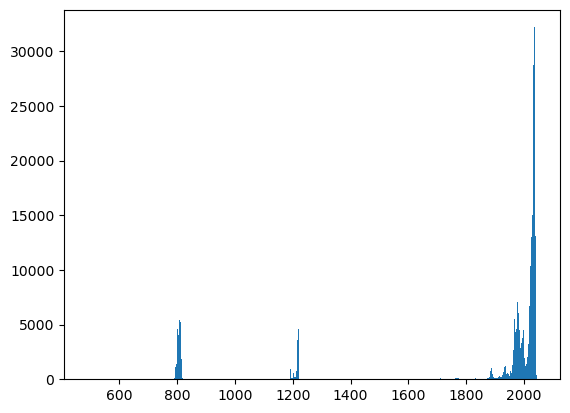

In [62]:
plt.hist(nuclear_train,500)
plt.show()

In [73]:
model = hmm.GaussianHMM(n_components=7, n_iter=10,random_state = 7969)

In [25]:
X = nuclear_train.values.reshape(-1, 1)

In [51]:
import time

In [74]:
t0 = time.time()

model.fit(nuclear_train.values.reshape(-1, 1))

print(time.time()-t0)

17.88148283958435


In [ ]:
# 8:49 takes a while now?
72 seconds

In [75]:

model.score(X)


-977597.9197827892

In [77]:
Z2 = model.predict(X)


(array([68282., 27720.,  3260., 15411., 10828., 68315., 57256.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

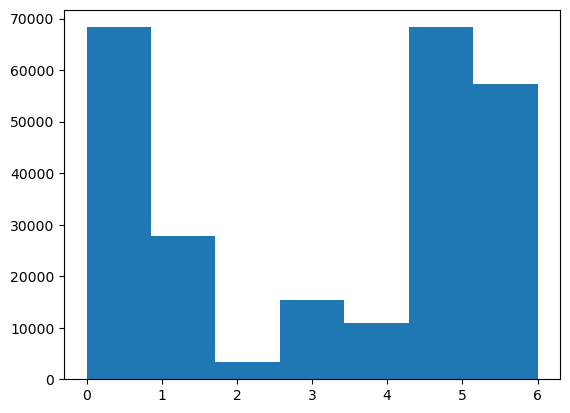

In [78]:
plt.hist(Z2,7)

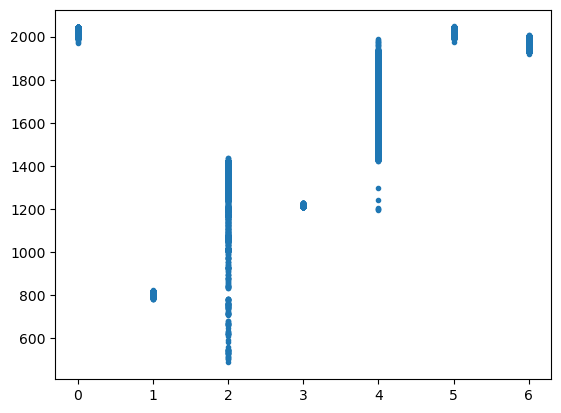

In [79]:
plt.plot(Z2,X,".")

In [56]:
vars(model)

{'n_components': 7,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': None,
 'n_iter': 5,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1882496.518704792, -1640146.6359867495, -1353406.8837315799, -1308237.0359656203, -1288226.3211458055],
     iter=5,
     n_iter=5,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'diag',
 'min_covar': 0.001,
 'means_prior': 0,
 'means_weight': 0,
 'covars_prior': 0.01,
 'covars_weight': 1,
 'n_features': 1,
 'startprob_': array([3.48208260e-07, 4.57101155e-22, 1.71514231e-48, 1.35956876e-19,
        9.95238382e-01, 4.76126956e-03, 8.38440272e-18]),
 'transmat_': array([[8.34489610e-01, 2.03301997e-07, 2.41736299e-29, 1.25161851e-06,
         1.62652995e-01, 2.65087840e-03, 2.05061224e-04],
        [1.46787423e-07, 3.00905505e-02, 2.56842459e-05, 8.64733210e-06,
         1.44516109e-11, 1.11287586e-

In [100]:
np.log(model.transmat_+.1)

array([[-1.93216604, -2.30258509, -2.30258509, -2.30258509, -2.30151275,
         0.05359627, -2.30258499],
       [-2.30258509,  0.09511294, -2.30041803, -2.30258509, -2.30258509,
        -2.30258509, -2.30258509],
       [-2.30258509, -2.27740038,  0.08995393, -2.30258509, -2.26986944,
        -2.30258509, -2.30258509],
       [-2.30258509, -2.30258509, -2.30019216,  0.09492059, -2.30069798,
        -2.30258509, -2.30258509],
       [-2.30258509, -2.30258075, -2.29841647, -2.29571029,  0.0913954 ,
        -2.30258509, -2.27118505],
       [ 0.09499245, -2.30258509, -2.30258509, -2.30258509, -2.30258476,
        -2.30258501, -2.29909716],
       [-2.30258494, -2.30258509, -2.30258509, -2.30258509, -2.29754599,
        -2.29509873,  0.09416712]])

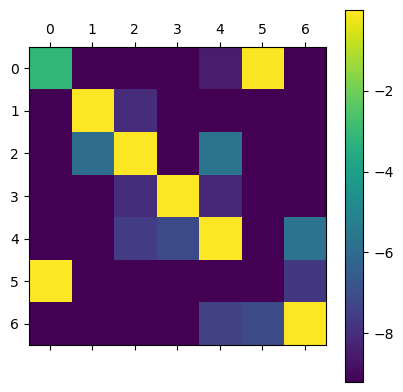

In [102]:
plt.matshow(np.log(model.transmat_+.0001));
plt.colorbar()
plt.show()


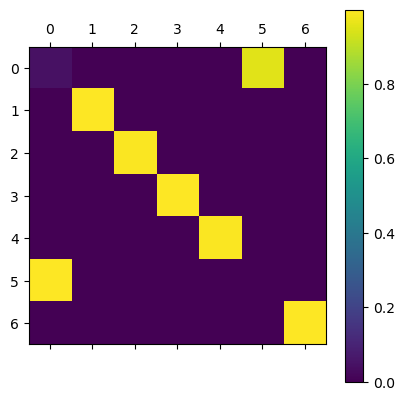

In [90]:
plt.matshow((model.transmat_));
plt.colorbar()
plt.show()


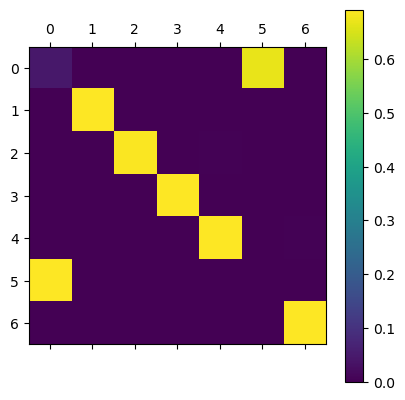

In [88]:
plt.matshow(np.log(model.transmat_+1));
plt.colorbar()
plt.show()


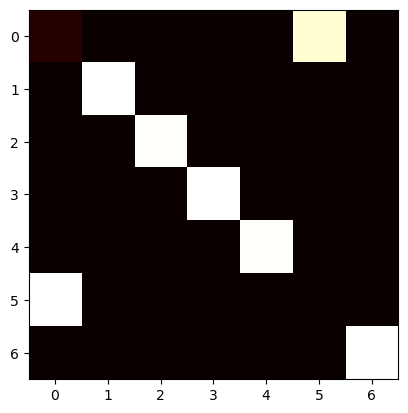

In [80]:
plt.imshow(model.transmat_, cmap='hot', interpolation='nearest')


Two of the states are redundant/equivalent to other states. Train with 5 latent states next

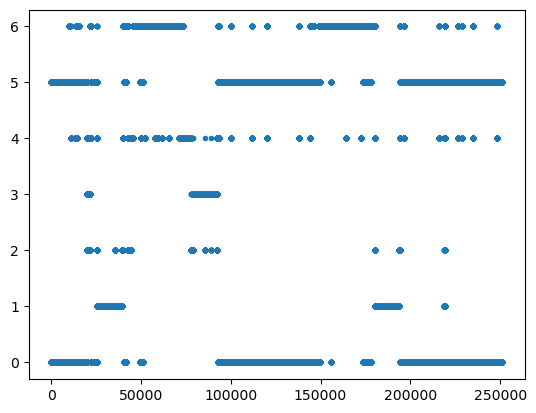

In [85]:
plt.plot(Z2,marker = '.',linestyle="None")

In [ ]:
len(nuclear_train)

In [104]:
X, Z = model.sample(len(nuclear_train))


In [105]:
Xsamp = X
Zsamp = Z

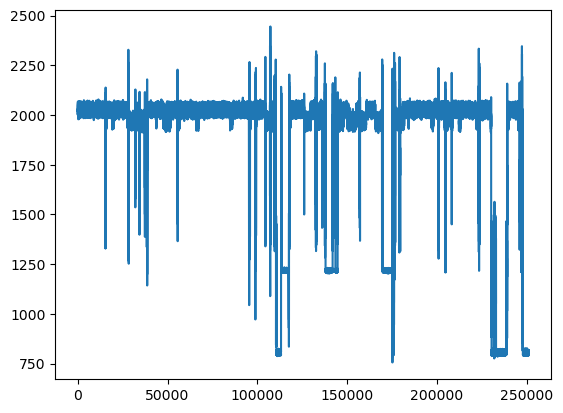

In [106]:
plt.plot(Xsamp)

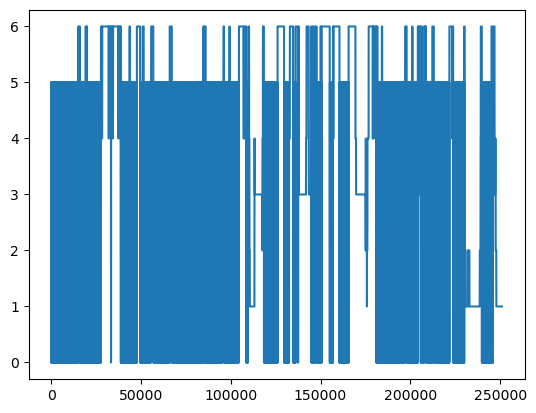

In [107]:
plt.plot(Zsamp)

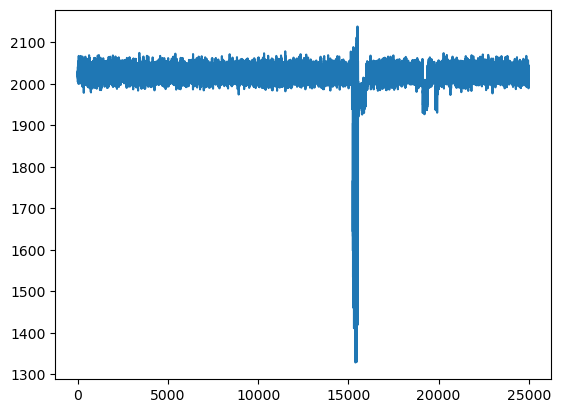

In [108]:
plt.plot(Xsamp[:25000])

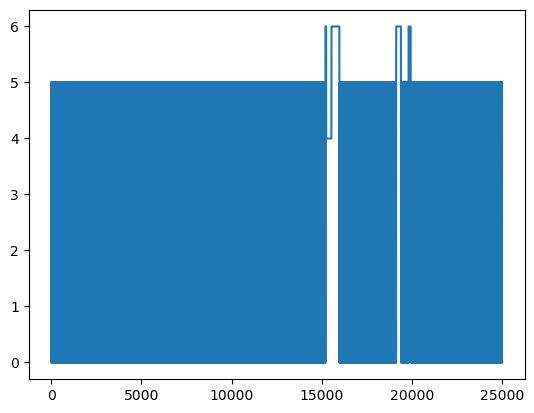

In [109]:
plt.plot(Zsamp[:25000])

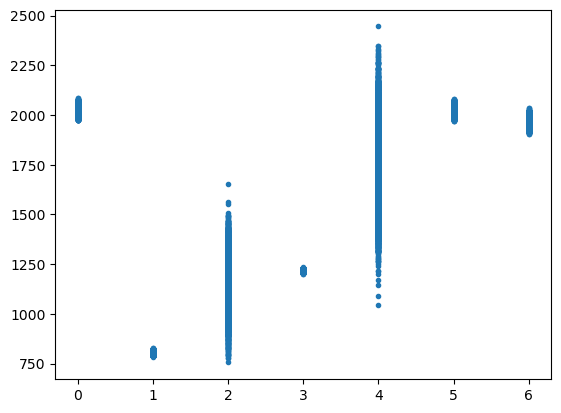

In [110]:
plt.plot(Zsamp,Xsamp,".")

In [114]:
model

GaussianHMM(n_components=7, n_iter=60, random_state=7969)

## Try testing 10 different models for a better model

In [111]:
max_score = model.score(X)
best_model = model

In [127]:
9//4

2

In [17]:
for i in range(10):
    print((7+i//4, 40-i*3, 7969+i))

(7, 40, 7969)
(7, 37, 7970)
(7, 34, 7971)
(7, 31, 7972)
(8, 28, 7973)
(8, 25, 7974)
(8, 22, 7975)
(8, 19, 7976)
(9, 16, 7977)
(9, 13, 7978)


In [116]:
t0 = time.time()
for i in range(10):
    model = hmm.GaussianHMM(n_components=7+i//4, n_iter=40-i*3,random_state = 7969+i)
    model.fit(nuclear_train.values.reshape(-1, 1))

    print(time.time()-t0)
    if model.score(X) > max_score:
        max_score = model.score(X)
        best_model = model


57.159600019454956
117.50313425064087
173.8690276145935
218.39509868621826
264.82974576950073
308.02889943122864
347.8242115974426
382.51972699165344
424.9591450691223
466.59375977516174


In [117]:
max_score

-812388.7887550885

In [118]:
best_model

GaussianHMM(n_components=7, n_iter=31, random_state=7972)

In [121]:
model = best_model

In [119]:
with open("HMM_best_GenFuelMix12_12.pkl", "wb") as file: pickle.dump(best_model, file)


In [26]:
Z2 = model.predict(X)


In [132]:
model.means_.flatten()

array([1467.02195604, 1920.08492997,  805.95204388, 2023.71296318,
       2035.09892362, 1218.81158516, 1982.22941618])

In [129]:
model_means = means model.means_

array([[1467.02195604],
       [1920.08492997],
       [ 805.95204388],
       [2023.71296318],
       [2035.09892362],
       [1218.81158516],
       [1982.22941618]])

In [29]:
pred_mean = model.means_[Z2]

In [142]:
pred_mean-pred_std

array([[2032.64621632],
       [2032.64621632],
       [2032.64621632],
       ...,
       [2018.32025168],
       [2018.32025168],
       [2018.32025168]])

In [32]:
pred_std = np.sqrt(model._covars_)[Z2]

In [30]:
x_range = np.arange(len(pred_mean))

In [166]:
np.sqrt(np.mean(np.square(pred_mean.flatten()-nuclear_train)))

46.97646793046818

In [167]:
np.sqrt(np.mean(np.square(nuclear_train.diff())))

2.5586913051948876

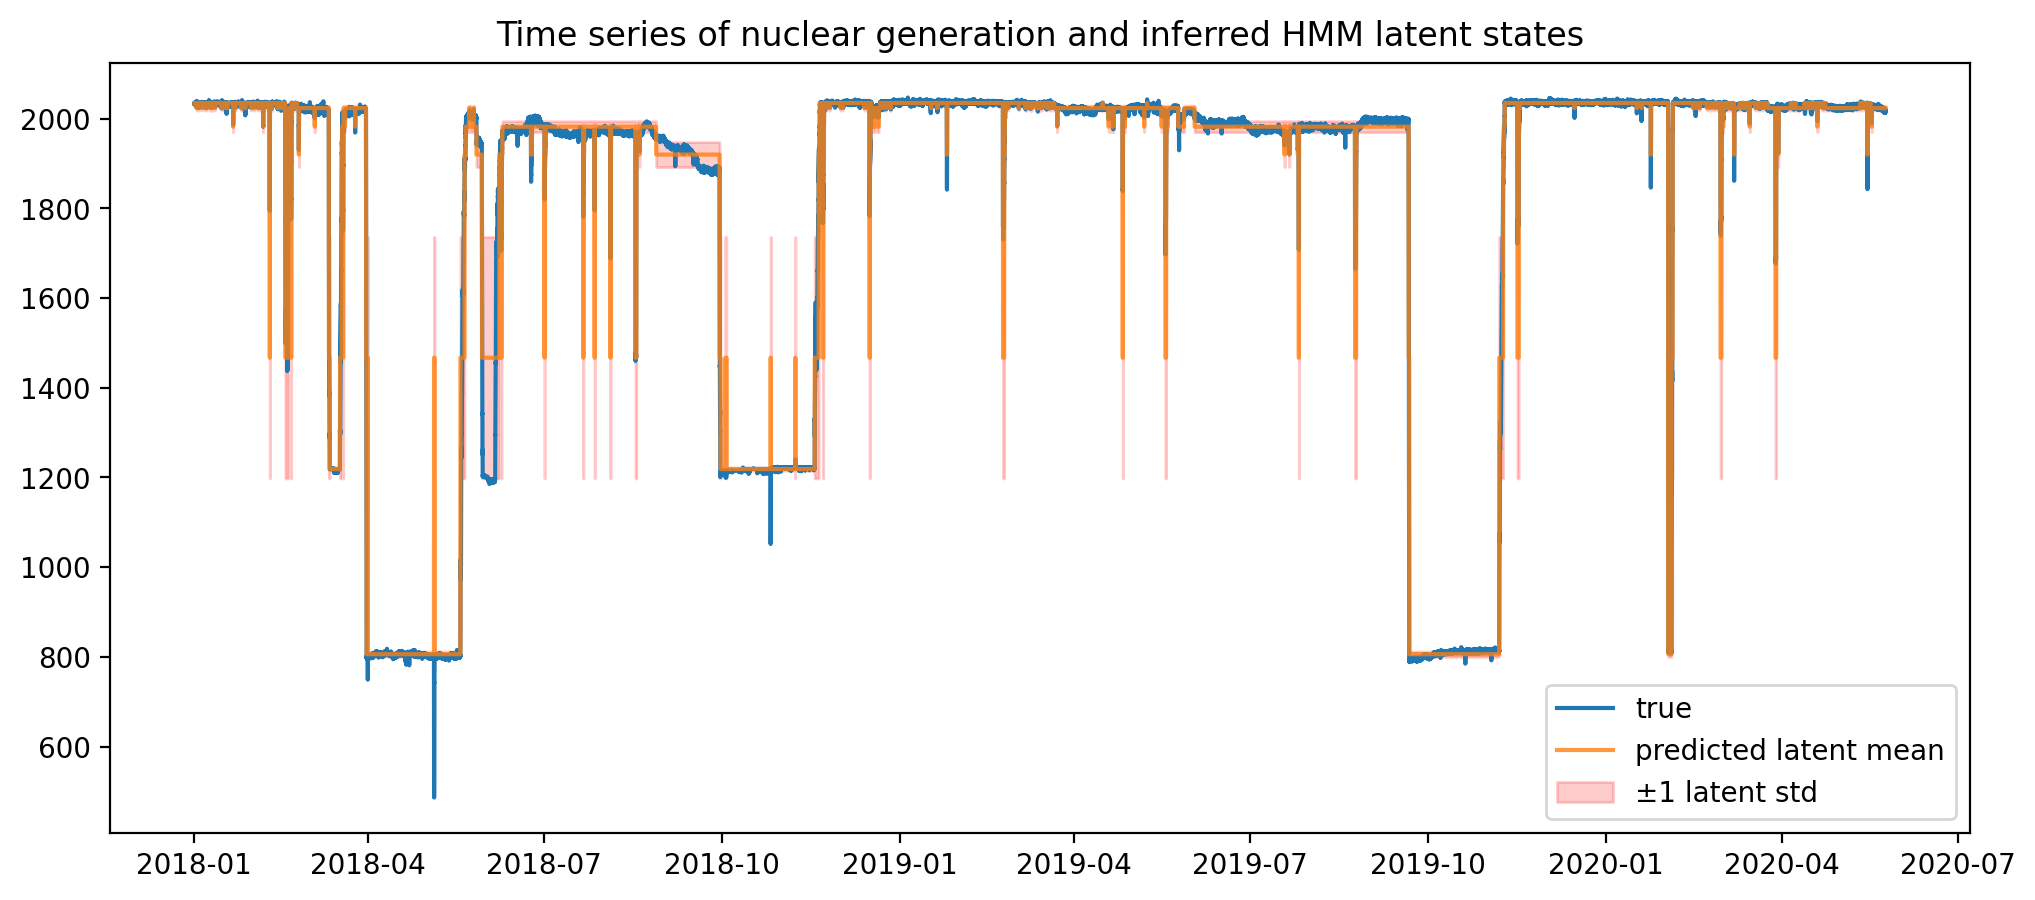

In [75]:
plt.figure(figsize=(12, 5),dpi=200)

# Plot the confidence interval
plt.plot(date_train,nuclear_train,label = "true")
plt.plot(date_train, pred_mean, label = 'predicted latent mean', alpha = .8)
plt.fill_between(date_train, (pred_mean-pred_std).flatten(), (pred_mean+pred_std).flatten(), color='red', alpha=0.2, label = "±1 latent std")

plt.legend()
plt.title("Time series of nuclear generation and inferred HMM latent states")

# plt.xlim(43000,51000)
# plt.ylim(1120,2100)
plt.show()

In [136]:
pred_std

array([[2.4527073],
       [2.4527073],
       [2.4527073],
       ...,
       [5.3927115],
       [5.3927115],
       [5.3927115]])

In [128]:
Z2

array([4, 4, 4, ..., 3, 3, 3], dtype=int64)

Text(0.5, 1.0, 'Histogram of latent states')

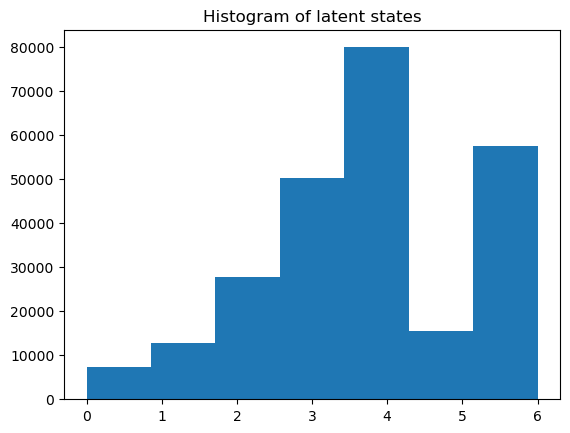

In [69]:
plt.hist(Z2,7)
plt.title("Histogram of latent states")



Text(0, 0.5, 'actual observations')

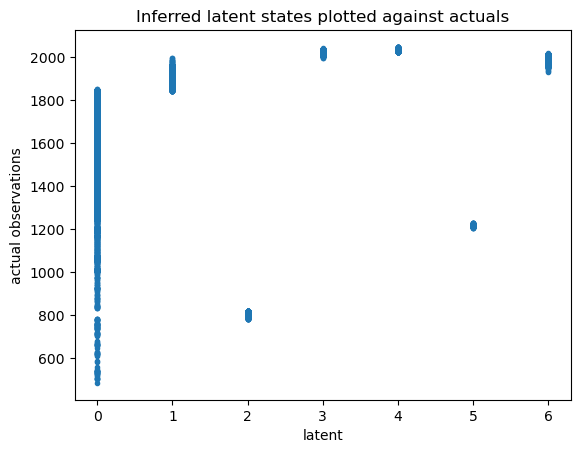

In [73]:
plt.plot(Z2,X,".")
plt.title("Inferred latent states plotted against actuals")
plt.xlabel("latent")
plt.ylabel("actual observations")


In [125]:
vars(model)

{'n_components': 7,
 'params': 'stmc',
 'init_params': 'stmc',
 'startprob_prior': 1.0,
 'transmat_prior': 1.0,
 'algorithm': 'viterbi',
 'random_state': 7972,
 'n_iter': 31,
 'tol': 0.01,
 'verbose': False,
 'implementation': 'log',
 'monitor_': ConvergenceMonitor(
     history=[-1811085.2338641402, -1423845.6955395036, -1314511.8248984867, -1252496.6322377766, -1169761.8885900886, -1108673.420950329, -1039805.8449937173, -974439.6678801703, -922353.2630434223, -901150.5217115922, -864271.1198069946, -851538.3475390808, -843772.2004667454, -837830.7505589775, -834516.1529645156, -832651.0941577228, -831713.8344422318, -831050.9332544372, -830249.0753129567, -829134.540959471, -827907.6305830505, -826050.8236975848, -821162.5572901374, -815848.5787890864, -813427.7224757449, -812794.7874212747, -812531.8851105612, -812441.9951112363, -812411.0384963701, -812402.6754216865, -812396.7770359768],
     iter=31,
     n_iter=31,
     tol=0.01,
     verbose=False,
 ),
 'covariance_type': 'dia

TODO: set init_params to "" and keep training?

In [15]:
1-np.diag(model.transmat_)

array([0.00505379, 0.00497251, 0.00018038, 0.00519171, 0.00273086,
       0.00039011, 0.0012813 ])

In [37]:
model.transmat_[0,4]

2.4022216996434176e-198

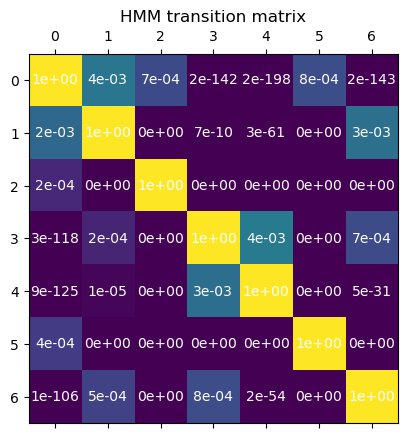

In [74]:
fig, ax = plt.subplots()
min_val, max_val = 0, 6


img = ax.matshow(np.log(model.transmat_+.0001));
# plt.colorbar(img, ax = ax)
for i in range(7):
    for j in range(7):
        c = model.transmat_[j,i]
        ax.text(i, j, str("{:.0e}".format(c)), va='center', ha='center',color = "white")
plt.title("HMM transition matrix")
plt.show()

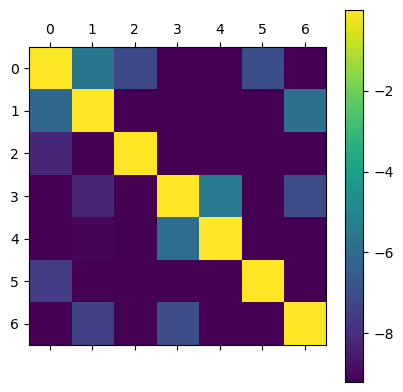

In [11]:
plt.matshow(np.log(model.transmat_+.0001));
plt.colorbar()
plt.show()


Forecast:


In [179]:
Z2[-1]

3

In [181]:
state = np.zeros(model.n_components)

In [183]:
state[Z2[-1]] = 1

In [186]:
state.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [190]:
np.linalg.matrix_power

<function numpy.linalg.matrix_power(a, n)>

In [193]:
model.means_[np.argmax(np.linalg.matrix_power(model.transmat_,209999) @ state.reshape(-1,1))]

array([2035.09892362])

In [202]:
model.means_

array([[1467.02195604],
       [1920.08492997],
       [ 805.95204388],
       [2023.71296318],
       [2035.09892362],
       [1218.81158516],
       [1982.22941618]])

How to predict from HMM? Use Viterbi last most likely state, Get most likely next state, and use that state's mean.

Long term forecast, apply transition matrix

More distribution wise would get probabilities for last state, apply transition matrix, and get a Gaussian mixture model.

In [212]:
Z3 = model.predict_proba(X)

In [215]:
Z3[-1]

array([3.71498673e-13, 5.83309582e-08, 0.00000000e+00, 9.99996601e-01,
       9.04199308e-11, 0.00000000e+00, 3.34093808e-06])

In [206]:
pred_hmm = []
for i in range(2000):
    pred_hmm.append(model.means_[np.argmax(np.linalg.matrix_power(model.transmat_,i) @ state.reshape(-1,1))])

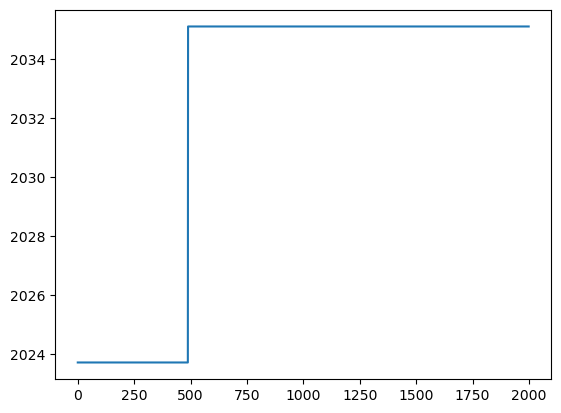

In [207]:
plt.plot(pred_hmm)